# Note on GAN/ODE

## Background
After reading the following paper interpreting the gradient descent in terms of ODE solver:

Training Generative Adversarial Networks by Solving Ordinary Differential Equations by Qin, Wu, et al, DeepMind, https://arxiv.org/abs/2010.15040

As an illustrative example, they consider:
\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t} = -
\left(
\begin{array}{cc}
\epsilon & -1 \\ 1 & 0
\end{array}
\right)
x
\end{equation}
where $x = (\theta, \phi)$.

Then, they say: 

"...when $\epsilon = 0.1$. When we choose $\Delta t = 0.2$ for 200 timestep, Euler's method diverges while RK2 converges". 

Interestingly, the paper does not mention a classical concept of the ODE stability region to explain this observation. The purpose of the notebook is to illustrate it. 

For example, see http://web.mit.edu/course/16/16.90/OldFiles/BackUp/www/pdfs/Chapter10.pdf for the stability region. 

***
© 2020 Youngsuk Lee (lee.youngsuk@gmail.com)

In [1]:
%matplotlib inline
import os, sys
import matplotlib.pyplot as plt
import numpy as np

## Find the eigenvalues of the matrix and plot against the stability regions

### Find eigenvalues

In [2]:
# eigenvalues
eps = 0.1
A = -np.array([[eps, -1.0],[1.0, 0]])
eigvs = np.linalg.eigvals(A)
eigvs

array([-0.05+0.99874922j, -0.05-0.99874922j])

### Amplification factor and functions

In [3]:
# amp = lambda * dt where lambda is effectively eigenvalue
dt = 0.2
z_eigvs = eigvs * dt

In [4]:
# growth rate functions
af_euler = lambda z: 1 + z
af_rk2 = lambda z: 1 + z + 0.5 * z**2
af_rk4 = lambda z: 1 + z + 0.5 * z**2 + (1.0/6) * z**3 + (1.0/24) * z**4
kw_af = {'Euler':af_euler, 'RK2':af_rk2, 'RK4':af_rk4}

### Amplification factors
If the absolute value is larger than 1, it is convergent

In [5]:
print('amplification factor: ')
for n, af in kw_af.items():
    aaf = np.abs(af(z_eigvs[0]))
    print(n + ':' + str(np.abs(af(z_eigvs[0]))) + ', ' + ('to converge ' if aaf < 1.0 else 'to diverge'))

amplification factor: 
Euler:1.0099504938362078, to diverge
RK2:0.9900505037623081, to converge 
RK4:0.9900500559736024, to converge 


### Plotting stability regions

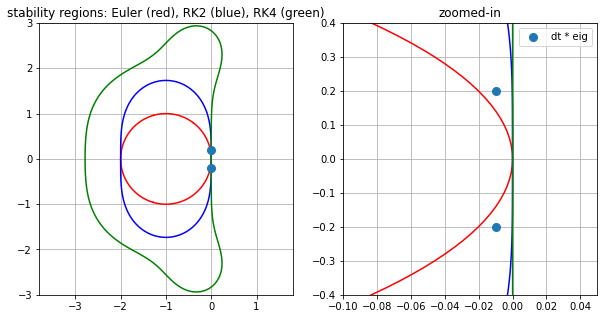

In [6]:
# translated from the matlab codes in the above note
v_x = np.linspace(-3, 1, 301)
v_y = np.linspace(-3, 3, 301)
x, y = np.meshgrid(v_x, v_y)
# calculate z = lambda * dt
z = x + (1.0j)*y

def draw_amplification_factors():
    ctr_colors = ['r', 'b', 'g']
    for idx, n in enumerate(kw_af):
        af = kw_af[n]
        plt.contour(x, y, np.abs(af(z)), [1], colors=[ctr_colors[idx]])
    plt.plot(z_eigvs.real, z_eigvs.imag, 'o', ms=8, label='dt * eig')
    plt.grid()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
draw_amplification_factors()
plt.axis('equal')
plt.title('stability regions: Euler (red), RK2 (blue), RK4 (green)')
plt.subplot(1,2,2)
draw_amplification_factors()
plt.xlim([-0.1, 0.05])
plt.ylim([-0.4, 0.4])
plt.title('zoomed-in')
plt.legend()
plt.show()

## Conclusion
The convergence of RK2 and the divergence of Euler for the example in the paper can be explained in terms of the amplifcation factors and stability regions. 

# END